## Testing BPASS isochrone at $10^{9.3}$ Years of Age and Comparing MIST Models $0.1Z_{\odot}$
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for $10^{9.3}$ years age, a tenth of solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

I use the MISTv.1 for comparison since only MISTv.1 and BPASS can account for non-solar metallicities.

## This is for tutorial as well as debugging and demonstration purposes.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
iso1=synthetic.Isochrone_Binary(9.3, 0.0, 1000, math.log10(1/10), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=5.00 for T= 21446 logg=6.93
Changing to logg=5.00 for T= 20406 logg=6.94
Changing to logg=5.00 for T= 20815 logg=7.18
Changing to logg=5.00 for T= 37166 logg=7.13
Changing to logg=4.00 for T= 35409 logg=3.94
Changing to logg=5.00 for T= 20536 logg=7.03
Changing to logg=5.00 for T= 19488 logg=6.97
Changing to logg=2.00 for T=  9954 logg=1.62
Changing to logg=5.00 for T= 20775 logg=7.05
Changing to logg=5.00 for T= 20895 logg=7.17
Changing to logg=5.00 for T= 22614 logg=7.26
Changing to logg=5.00 for T= 19498 logg=6.97
Changing to logg=5.00 for T= 21461 logg=7.15
Changing to logg=5.00 for T= 23300 logg=6.77
Changing to logg=5.00 for T= 18710 logg=6.87
Changing to logg=5.00 for T= 21459 logg=7.14
Changing to logg=5.00 for T= 19614 logg=6.94
Changing to logg=5.00 for T= 19956 logg=6.89
Changing to logg=5.00 for T= 20066 logg=7.06
Changing to logg=5.00 for T= 21555 logg=7.08
Changing to logg=5.00 for T= 19610 logg=6.86
Changing to logg=5.00 for T= 21043 logg=7.20
Changing t

As a sanity check, I would like to make sure that, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (models with phase 101), and non-white dwarf compact remnants are determined to be of phase 102, 103. Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged. Merged secondaries have phase of -99.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x==102 or x==103) for
        x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101 or x==102 or x==103) for
        x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x==102 or x==103 or x==-99) for
        x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
np.max(iso1.singles['logg'])

9.294221355125417

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.294221355125417

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.294186013434684

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

6.775107941964203

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

6.887700577787118

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

5.438029879311406

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

7.9748904281098465

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

8.079390004361564

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.54017073649751

Text(0.5, 0, 'logg in cgs')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


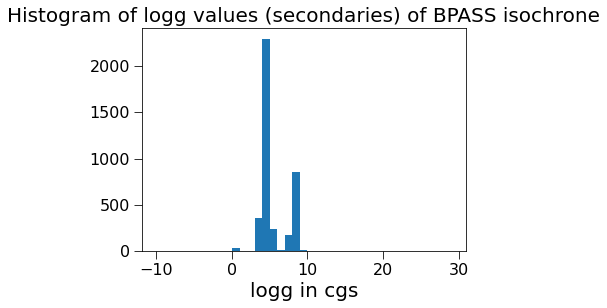

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]),
         np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

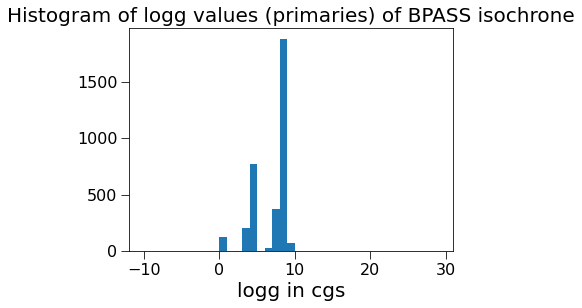

In [15]:
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]),
         np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

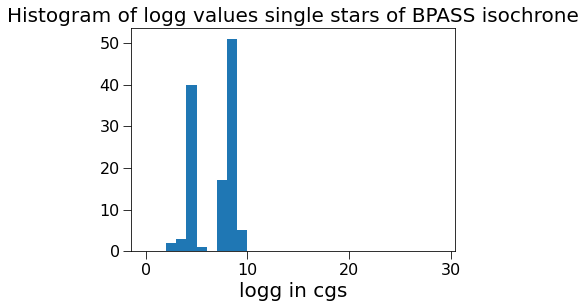

In [16]:
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Plot the CMD of the isochrones at 0.1Z_solar and 10^9.3 years of age for **high** surface graivity (log-g >= 5 cgs) type stars.

Account for distance modulus for dist = 1000 pc 

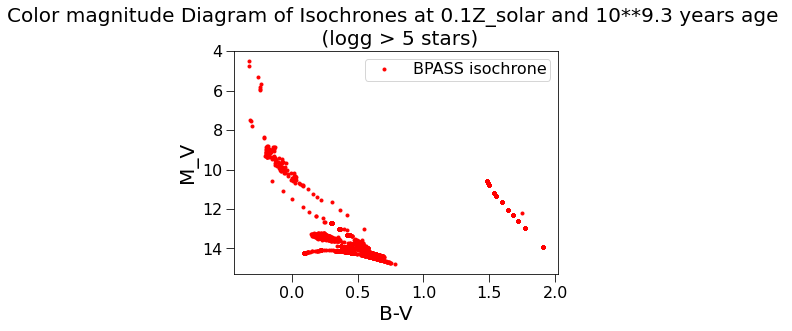

In [17]:
indices1= np.where(iso1.singles['logg'] > 5)[0]
indices2= np.where(iso1.primaries['logg'] > 5)[0]
indices3= np.where(iso1.secondaries['logg'] > 5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2] - iso1.primaries["m_ubv_V"][indices2],
         iso1.primaries["m_ubv_V"][indices2] - 5 * np.log10(1000/10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3] - iso1.secondaries["m_ubv_V"][indices3],
         iso1.secondaries["m_ubv_V"][indices3] - 5 * np.log10(1000/10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1] - iso1.singles["m_ubv_V"][indices1],
         iso1.singles["m_ubv_V"][indices1] - 5 * np.log10(1000/10), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and " +
          "10**9.3 years age \n (logg > 5 stars)")
plt.gca().invert_yaxis()
plt.legend()

Are we getting white dwarves for the bottom left corner of the plot

In [18]:
indices2= np.where((iso1.primaries['logg'] > 5) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] > -0.4) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] < -0.2))[0]

In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [20]:
iso2=synthetic.IsochronePhot(9.3, 0.0, 1000,
                             math.log10(1 / 10), recomp=True)
# New MISTv.1 isochrone for same metallicity

Isochrone generation took 131.668602 s.
Making photometry for isochrone: log(t) = 9.30  AKs = 0.00  dist = 1000
     Starting at:  2021-07-25 18:10:28.029985   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.01 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3387 K  m_ubv_U = 26.52
M =   0.729 Msun  T =  5635 K  m_ubv_U = 16.47
M =   1.309 Msun  T =  8707 K  m_ubv_U = 12.36
M =   1.388 Msun  T =  5243 K  m_ubv_U = 12.16
M =   1.409 Msun  T =  4411 K  m_ubv_U = 10.38
M =   1.432 Msun  T =  4912 K  m_ubv_U = 10.71
M =   1.435 Msun  T =  4172 K  m_ubv_U = 10.35
M =   1.435 Msun  T =  4057 K  m_ubv_U = 10.45
M =   1.435 Msun  T =  3763 K  m_ubv_U = 11.03
M =   1.435 Msun  T =  3759 K  m_ubv_U = 11.06
M =   1.435 Msun  T =  3688 K  m_ubv_U = 11.35
M =   1.435 Msun  T =  6591 K  m_ubv_U = 5.83
M =   1.435 Msun  T = 64842 K  m_ubv_U = 9.11
M =   1.435 Msun  T = 74734 K  m_ubv_U = 15.94
Starting filter: ubv,B   Elapsed time: 5.37 seconds
Starting synthetic photom

Looking at the distribution of logg values. for the stars in the Parsec isochrone.

In [21]:
np.max(iso2.points['logg'])

7.902440169584496

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 526.,
        150., 182.,  80., 225.,  65.,  27., 119.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29]),
 <BarContainer object of 39 artists>)

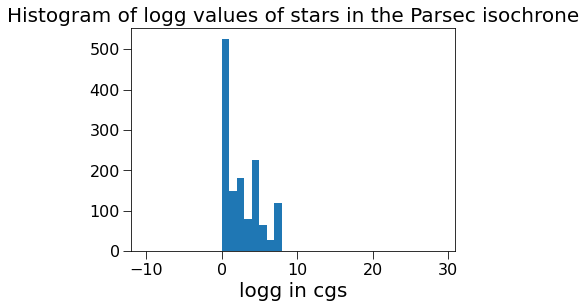

In [22]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]),
         np.arange(-10, 30, 1))

In [23]:
np.median(iso2.points['logg'])

2.0208530165838594

In [24]:
np.mean(iso2.points['logg'])

2.590379008647578

In [25]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr

Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [26]:
clus_1=synthetic.Cluster_w_Binaries(iso1,
                                    imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                    20000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2,
                                 imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 20000, ifmr=ifmr.IFMR_Spera15())

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:755: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Creating Interpolator for: Teff
Creating Interpolator for: L
Creating Interpolator for: logg
Creating Interpolator for: isWR
Creating Interpolator for: mass_current
Creating Interpolator for: phase
Creating Interpolator for: m_ubv_U
Creating Interpolator for: m_ubv_V
Creating Interpolator for: m_ubv_B
Creating Interpolator for: m_ubv_R
Creating Interpolator for: m_ubv_I


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Found 694 companions out of stellar mass range


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

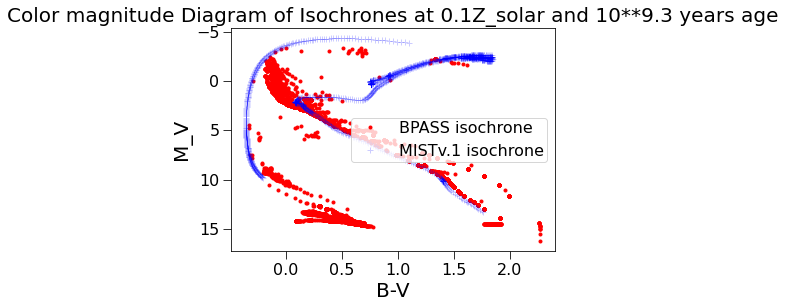

In [27]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(100),
         "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B'] - iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(100), "b+",
         label="MISTv.1 isochrone", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the Parsec isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

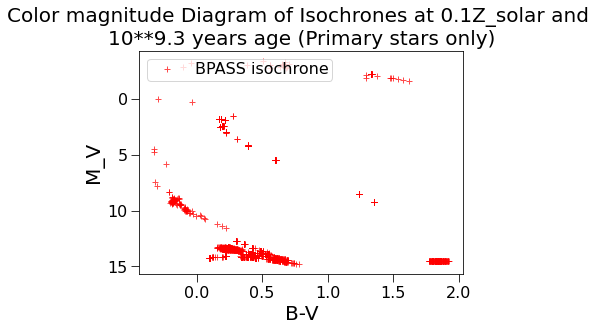

In [28]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(1000/10), "r+",
         label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and \n" +
          "10**9.3 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

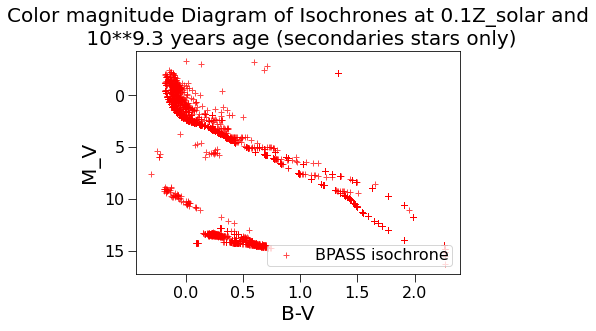

In [29]:
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(1000/10), "r+",
         label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and\n" +
          " 10**9.3 years age (secondaries stars only)")
plt.gca().invert_yaxis()
plt.legend()

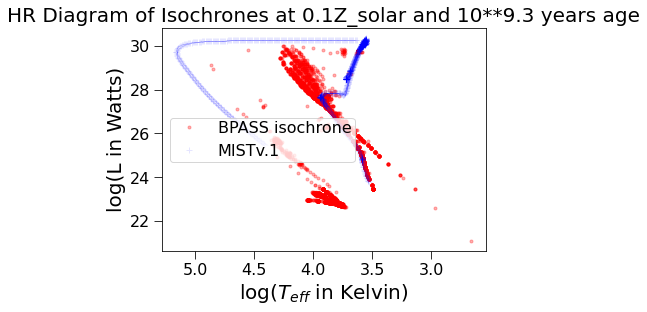

In [30]:
# Plotting HR diagrams
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]),
         "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]),
         "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.",
         label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+",
         label="MISTv.1", alpha =0.1)
plt.xlabel("log($T_{eff}$ in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

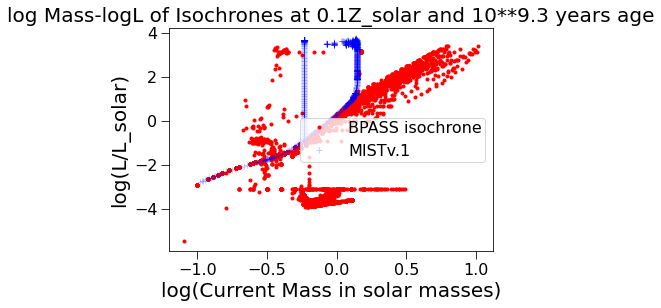

In [31]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']),
         np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']),
         np.log10(iso1.singles["L"] / cs.L_sun),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']),
         np.log10(iso2.points["L"] / cs.L_sun),
         "b+", label="MISTv.1", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.
First I take a look at the shape of the primary stars' plot for log current mass log L.

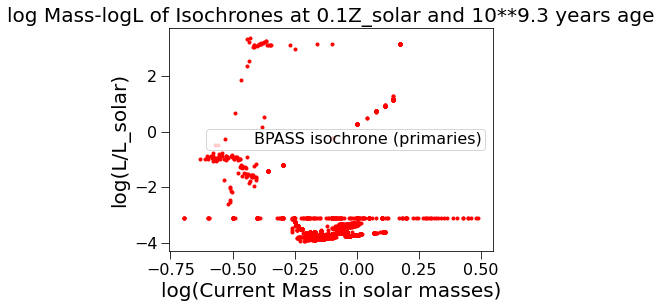

In [32]:
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun),
         "r.", label="BPASS isochrone (primaries)")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**9.3 years age")
plt.legend()

Which type of secondary star is it that is causing this strange pattern that looks like a line lingering in the bottom of the mass luminosity plot. I will examine the region where luminosity of the star is about $10^{-3.2} L_{\odot}$

In [33]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)<-2.5) &
                                   (np.log10(iso1.primaries["L"]/cs.L_sun)>=-3.3))[0]]

In [34]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
1.8,2.143724291205302e+23,7715.534188232673,9213861.169898476,7.947053181372584,False,0.56627,101.0,1,22.854458511060606,23.008767374472775,23.370926674694253,22.79255995117035,22.55598301458258
0.794328,3.041458738904333e+23,3090.2242766508484,68414816.14941925,4.338067498968938,False,0.794328,5.0,4,27.88227483178116,24.509965395287736,26.35203245956971,23.509850759620722,21.813175376360686
1.7,2.91673470464279e+23,8296.234132254533,9295562.263872195,7.93298604311574,False,0.55799,101.0,1,22.44334602268968,22.719791273951696,23.0194661342846,22.535024389684565,22.346801955440945
0.501187,3.041458738904333e+23,3090.2242766508484,68414816.14941925,4.138067424857716,False,0.501187,5.0,4,27.764725244840328,24.506753450543272,26.32391309268536,23.51337486794319,21.8172476830086
1.4,3.041458738904333e+23,3090.2242766508484,68414816.14941925,4.487285649973315,False,1.12,5.0,4,27.979092417875098,24.512368001208532,26.373496864635793,23.50722888671491,21.810146985372228
0.794328,3.041458738904333e+23,3090.2242766508484,68414816.14941925,4.463032888554764,False,1.059169,5.0,4,27.96275700893399,24.51197713824719,26.369979198434788,23.50765459494436,21.810638622045914
0.630957,3.041458738904333e+23,3090.2242766508484,68414816.14941925,4.327739919042661,False,0.7756616,5.0,4,27.875882894422432,24.50979930440156,26.350562464341145,23.510032457293676,21.81338528806574
1.7,2.884017750907803e+23,8245.234276303721,9357981.110667624,7.9222742264144586,False,0.55173,101.0,1,22.46107789948413,22.727537667200075,23.032324007645464,22.540207589091544,22.348046187918275


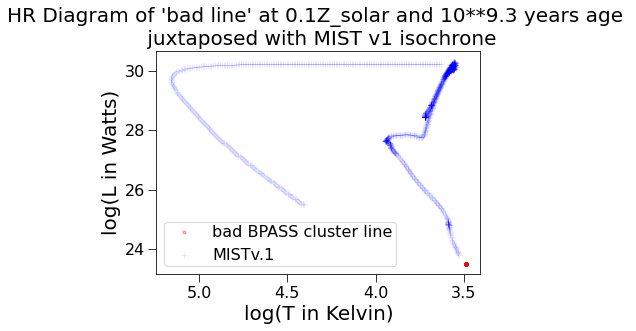

In [35]:
# Plotting HR diagrams
import matplotlib.pyplot as plt
bad_line2 = bad_line[np.where(bad_line['phase']==5)[0]]
plt.plot(np.log10(bad_line2['Teff']),
         np.log10(bad_line2["L"]), "r.",label="bad BPASS cluster line", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']),
         np.log10(iso2.points["L"]), "b+", label="MISTv.1", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of 'bad line' at 0.1Z_solar and" +
          " 10**9.3 years age \n juxtaposed with MIST v1 isochrone")
plt.gca().invert_xaxis()
plt.legend()

What sorts of characteristics (logg, Teff, L, mass) can be causing it? Let's find out

In [36]:
np.unique(bad_line['L'])

1.9351379461491437e+23
1.9481030626200675e+23
1.9509310873660553e+23
1.9518297312384177e+23
1.9574556412439005e+23
1.9759771998738914e+23
1.978116789566019e+23
1.989215932849611e+23
2.0125279895684763e+23
2.0265248290685556e+23
2.0543854431727328e+23


In [37]:
np.unique(bad_line['Teff'])

3090.2242766508484
7681.80007297507
7688.7723065107275
7710.117559901143
7710.206326420913
7710.41937023802
7710.792211082934
7715.534188232673
8233.813011134618
8235.538465914007
8245.234276303721


In [38]:
np.unique(bad_line['logg'])

3.7411582312714566
3.8380682442795133
3.8411579356380123
3.9380679486460686
3.941157428238497
3.9461783361956098
4.038067441246554
4.041157411849659
4.048869338808785
4.117882672930071
4.126039752921193


In [39]:
np.unique(bad_line['mass'])

0.251189
0.316228
0.398107
0.501187
0.630957
0.794328
0.9
1.0
1.1
1.2
1.25893


In [40]:
np.unique(bad_line['phase'])

5.0
101.0


It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


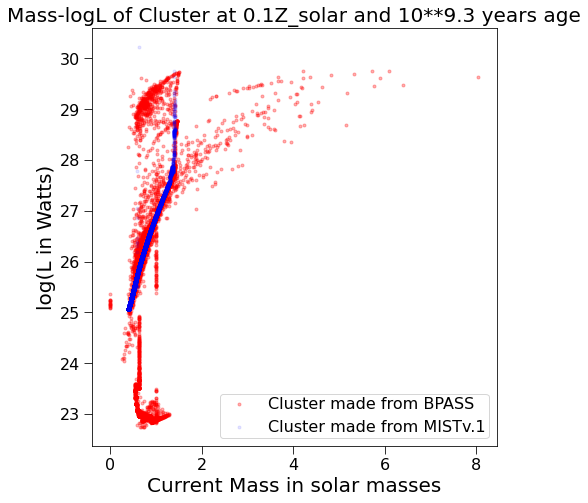

In [41]:
# Plot the mass-luminosity relationship
plt.figure(figsize = (7.5, 7.5))

plt.plot((clus_1.star_systems['mass_current']),
         np.log10(clus_1.star_systems["L"]),
         "r.", label="Cluster made from BPASS", alpha =0.3)
plt.plot((clus_1.companions['mass_current']),
         np.log10(clus_1.companions["L"]), "r.", alpha = 0.3)
plt.plot((clus_2.star_systems['mass_current']),
         np.log10(clus_2.star_systems["L"]),
         "b.", label="Cluster made from MISTv.1", alpha =0.1)
plt.plot((clus_2.companions['mass_current']),
         np.log10(clus_2.companions["L"]), "b.", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Where is that hook coming from?

In [42]:
np.unique(iso1.primaries[np.where(np.log10(iso1.primaries["L"]) <= 25)]['phase'])

5.0
101.0


In [43]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"]) <= 25) &
                            (iso1.primaries["phase"] > 5))])

2281

In [44]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) &
                            (iso1.primaries["phase"]==101))])

2281

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


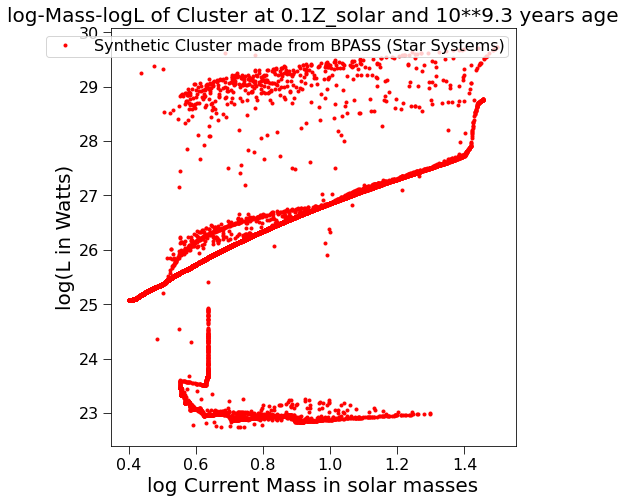

In [45]:
# Plot the mass-luminosity relationship
plt.figure(figsize = (7.5, 7.5))
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]),
         "r.", label="Synthetic Cluster made from BPASS (Star Systems)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


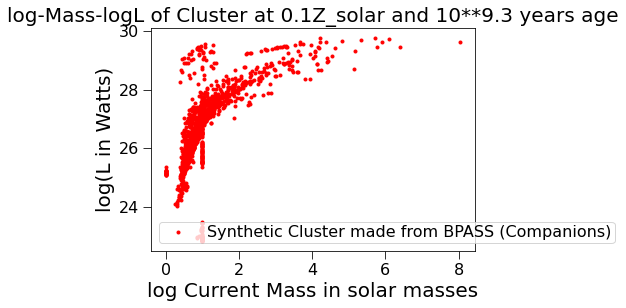

In [46]:
# Plot the mass-luminosity relationship
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]),
         "r.", label="Synthetic Cluster made from BPASS (Companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**9.3 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

In [47]:
np.unique(clus_1.companions['log_a'])

-3.9420040744010607
-3.465381996122942
-3.1476512464989197
-3.0788562972178823
-3.0726352367472423
-3.038157057821873
-2.854535641976513
-2.721386223264818
-2.6400789250626264
-2.6013550827350485
-2.443999913616424


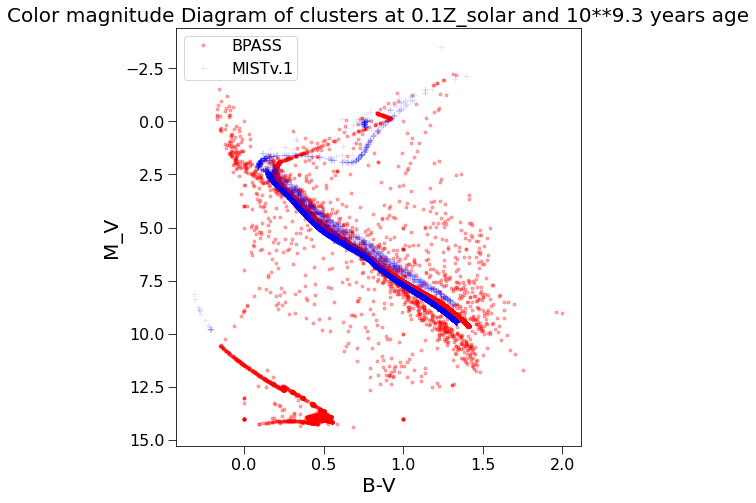

In [48]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
plt.figure(figsize = (7.5, 7.5))
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(100),
         "r.",label="BPASS", alpha =0.3)
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(100), "b+",
         label="MISTv.1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1Z_solar and 10**9.3 years age")
plt.gca().invert_yaxis()
plt.legend()

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


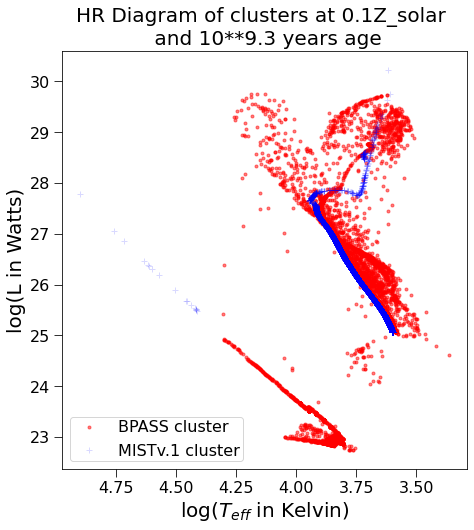

In [49]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]),
         "r.",label="BPASS cluster", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']),
         np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']),
         np.log10(clus_1.star_systems["L"]), "r.", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']),
         np.log10(clus_2.star_systems["L"]), "b+",
         label="MISTv.1 cluster", alpha=0.15)
plt.xlabel("log($T_{eff}$ in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of clusters at 0.1Z_solar \n and 10**9.3 years age")
plt.gca().invert_xaxis()
plt.legend()

If I look at the HR Diagram, I do see deviation with respects to the MIST line for some of the brighter stars, but I see an overall good trend with the main-sequence turnoff. Also, I see the compact remnants where they should be given my setup.

Looking at which stars are the white dwarves?

In [50]:
import numpy as np
np.where(clus_1.star_systems['phase'] == 101.0)[0]

array([    3,     4,     8, ..., 14918, 14921, 14945])

Do I see any black holes?

In [51]:
np.where(clus_1.star_systems['phase'] == 103.0)[0]

array([ 659,  752,  777, 1438, 1689, 1965, 2209, 2623])

Neutron Stars?

In [52]:
np.where(clus_1.star_systems['phase'] == 102.0)[0]

array([], dtype=int64)